In [ ]:
import pandas as pd
df = pd.read_csv('/content/students behave.csv')
print(df.head())


  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
print(df.columns)

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


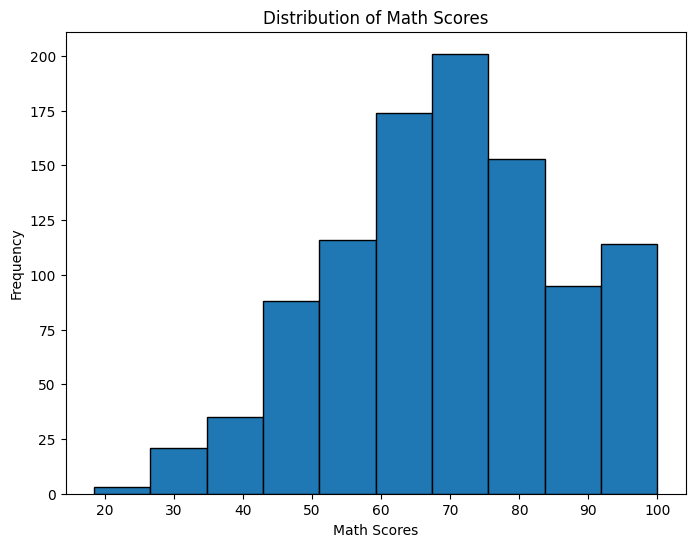

In [ ]:
plt.figure(figsize=(8, 6))
# Access the column using the correct name 'math score'
plt.hist(df['exam_score'], bins=10, edgecolor='black')
plt.xlabel('Math Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Math Scores')
plt.show()

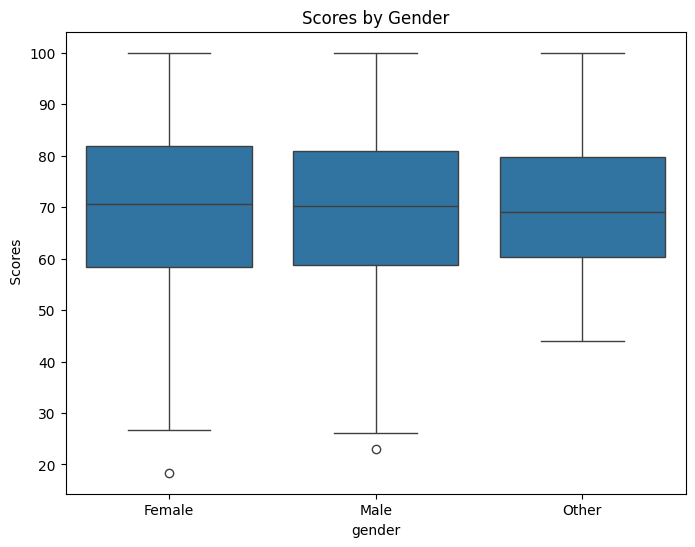

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='exam_score', data=df)  # Now 'sns' is recognized
plt.xlabel('gender')
plt.ylabel(' Scores')
plt.title('Scores by Gender')
plt.show()

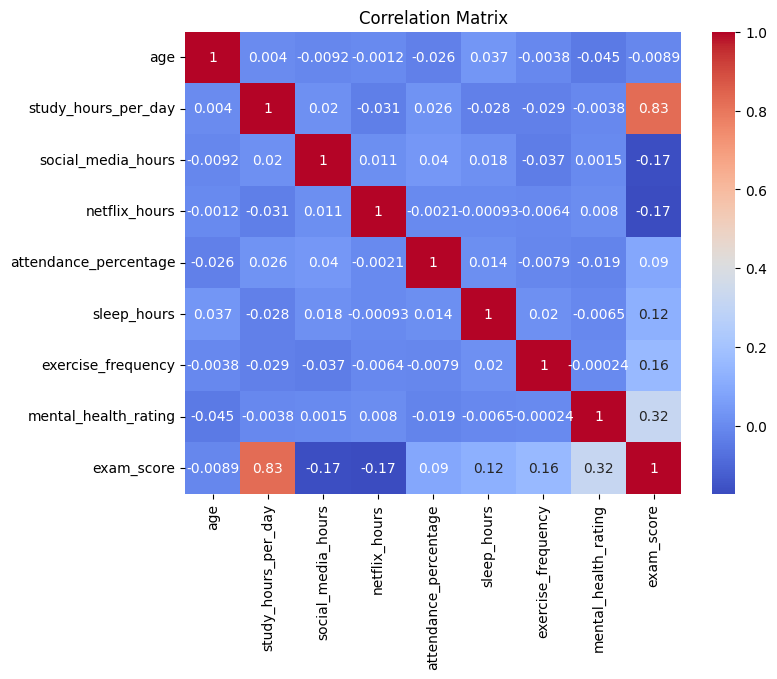

In [ ]:
# Correlation matrix heatmap
# Exclude non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# prompt: provide the summary about the pair plot.

# Pair plot summary
# The pair plot visualizes the relationship between all pairs of numerical variables in the DataFrame.
# Each small plot in the pair plot represents the relationship between two variables.
# The diagonal plots usually show the distribution of a single variable (e.g., a histogram or kernel density estimate).
# The off-diagonal plots typically show scatter plots to reveal correlations and patterns between pairs of variables.
# This allows to quickly identify potential relationships or patterns in the data and observe the distribution of each individual variable.


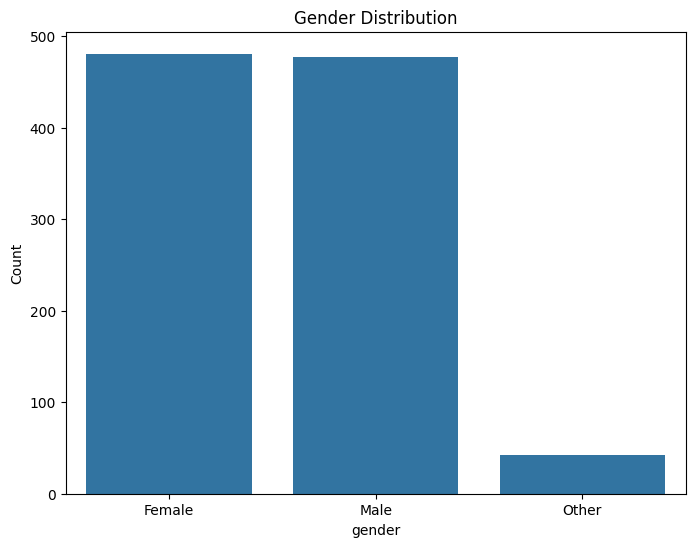

In [ ]:
# Count plot of a categorical column
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

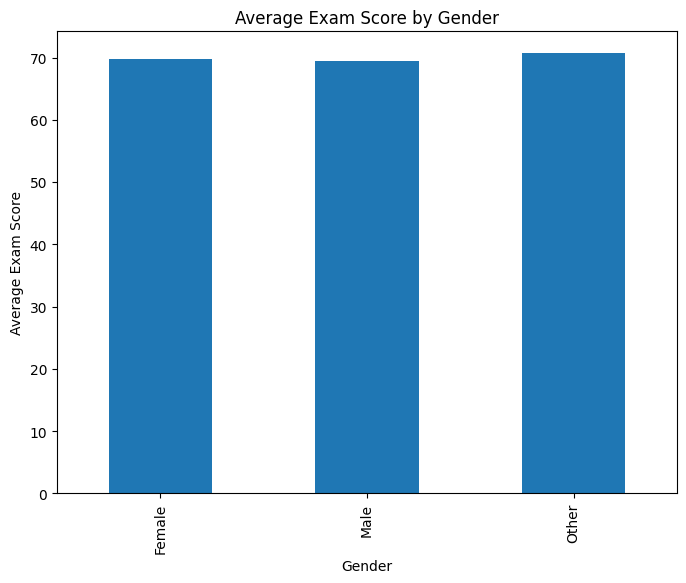

In [ ]:
# Bar plot of a numerical column grouped by a categorical column
plt.figure(figsize=(8, 6))
df.groupby('gender')['exam_score'].mean().plot(kind='bar') # Calculate mean score for each gender
plt.xlabel('Gender')
plt.ylabel('Average Exam Score')
plt.title('Average Exam Score by Gender')
plt.show()

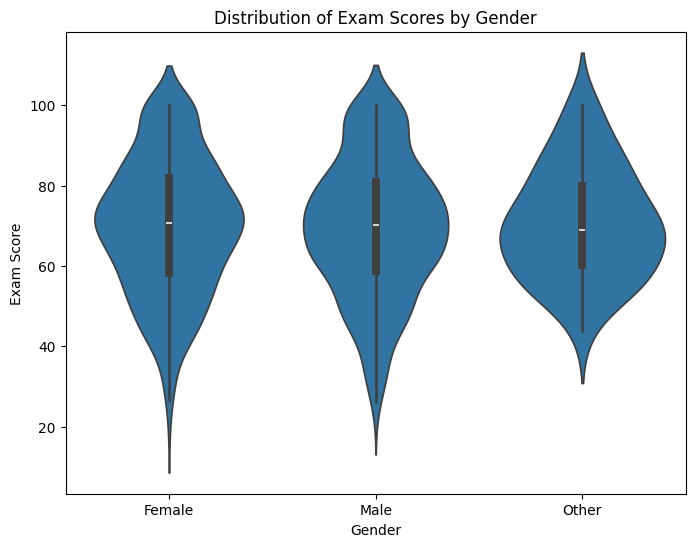

In [ ]:
# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='exam_score', data=df)
plt.xlabel('Gender')
plt.ylabel('Exam Score')
plt.title('Distribution of Exam Scores by Gender')
plt.show()

<ipython-input-11-c6b471703e09>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['exam_score'], shade=True)


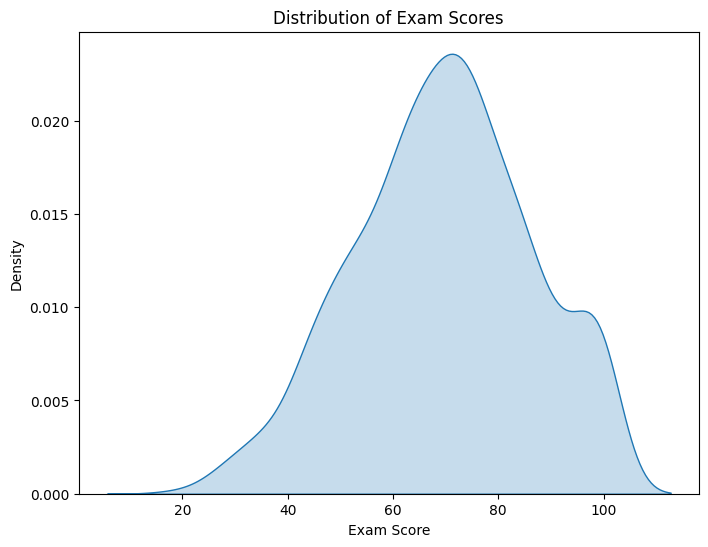

In [ ]:
# Density Plot
plt.figure(figsize=(8,6))
sns.kdeplot(df['exam_score'], shade=True)
plt.xlabel("Exam Score")
plt.ylabel("Density")
plt.title("Distribution of Exam Scores")
plt.show()

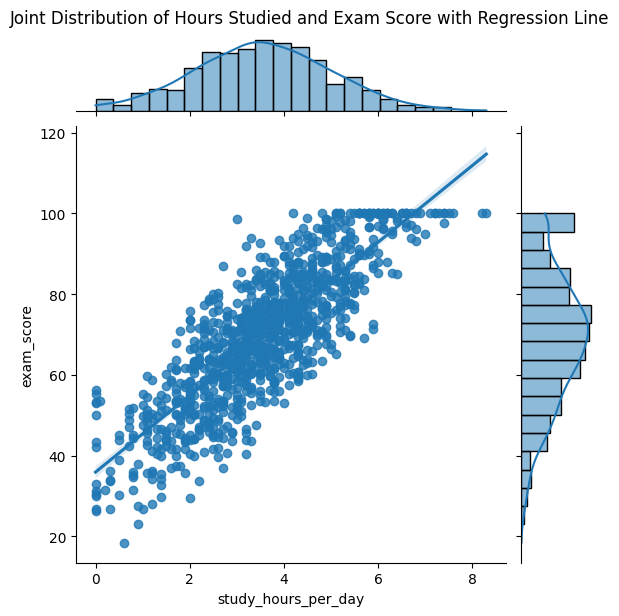

In [ ]:
# Joint Plot
sns.jointplot(x='study_hours_per_day', y='exam_score', data=df, kind='reg') # kind can be 'scatter', 'kde', 'hist', 'hex', 'reg'
plt.suptitle('Joint Distribution of Hours Studied and Exam Score with Regression Line', y=1.02) # Add title
plt.show()

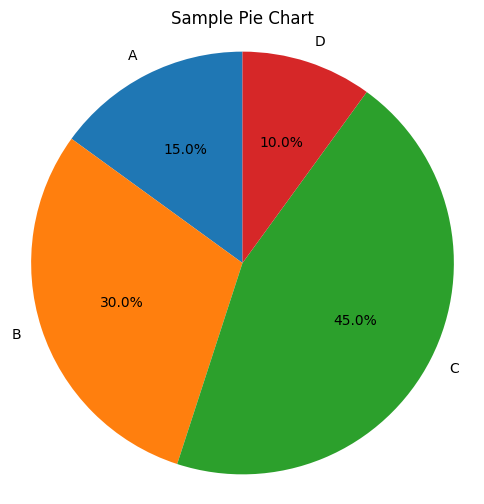

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sample Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


The pie chart shows the distribution of four categories (labeled A, B, C, and D) as percentages of a whole.

* **Category A:** Represents 15% of the whole.
* **Category B:** Represents 30% of the whole.
* **Category C:** Represents 45% of the whole.
* **Category D:** Represents 10% of the whole.

Category C is the largest portion, followed by B, then A, and lastly D.  The percentages shown make it easy to compare the relative sizes of each category.  Note that this is sample data and the provided code doesn't explain what A, B, C, and D represent in the context of the overall data analysis.  To gain a complete understanding, you need to refer to the actual data source.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Define features (X) and target variable (y)
X = df[['study_hours_per_day']]  # Example: Using 'study_hours_per_day' as the feature
y = df['exam_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train 20% test

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can further analyze the model's coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Example prediction for a new student studying 5 hours per day
new_student_hours = np.array([[5]])
predicted_score = model.predict(new_student_hours)
print(f"Predicted exam score for a student studying 5 hours/day: {predicted_score[0]}")

Mean Squared Error: 85.15911189769265
R-squared: 0.6679038641633215
Coefficients: [9.51935182]
Intercept: 35.958711131717976
Predicted exam score for a student studying 5 hours/day: 83.5554702481597


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Accuracy: 0.65
              precision    recall  f1-score   support

        high       0.53      0.60      0.56        45
         low       0.77      0.65      0.70        51
      medium       0.66      0.67      0.67       104

    accuracy                           0.65       200
   macro avg       0.65      0.64      0.64       200
weighted avg       0.66      0.65      0.65       200



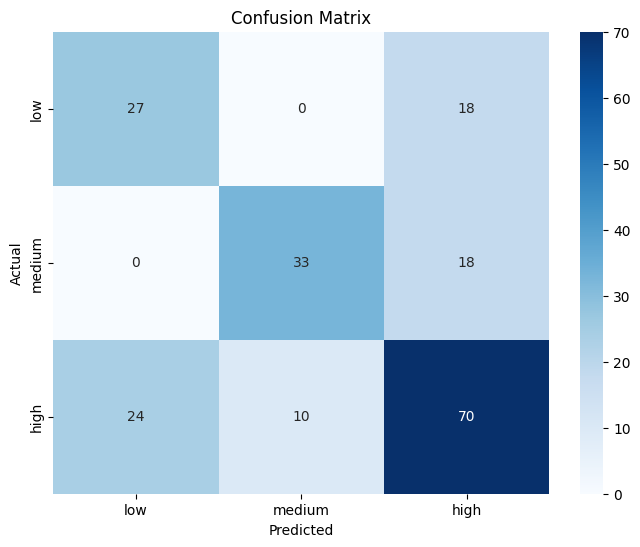

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (assuming it's already loaded in df)
# df = pd.read_csv('/content/students behave.csv')

# Assuming 'exam_score' needs to be categorized for classification
# Convert 'exam_score' to categorical labels (e.g., 'low', 'medium', 'high')
def categorize_score(score):
    if score < 60:
        return 'low'
    elif score < 80:
        return 'medium'
    else:
        return 'high'

df['exam_category'] = df['exam_score'].apply(categorize_score)

# Define features (X) and target variable (y)
X = df[['study_hours_per_day', 'gender']]  # Include relevant features
X = pd.get_dummies(X, columns=['gender'], drop_first=True) #One-hot encode 'gender'
y = df['exam_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['low', 'medium', 'high'],
            yticklabels=['low', 'medium', 'high'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

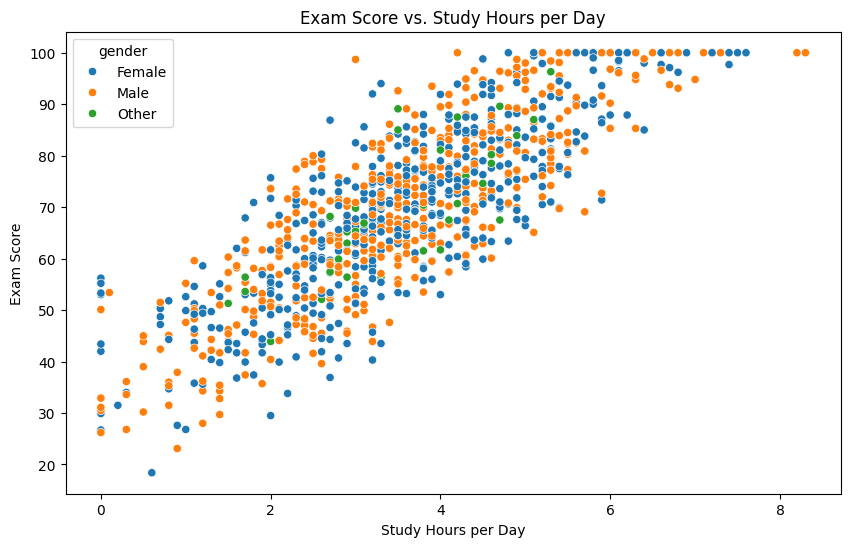

             age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.

In [ ]:
import matplotlib.pyplot as plt
# Assuming df is already loaded as in the provided code

# ... (your existing code) ...


# Further EDA (example: exploring the relationship between 'study_hours_per_day' and 'exam_score' with a scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, hue='gender')
plt.title('Exam Score vs. Study Hours per Day')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.show()

# Descriptive statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Define features (X) and target variable (y)
X = df[['study_hours_per_day', 'gender']]  # Include relevant features
X = pd.get_dummies(X, columns=['gender'], drop_first=True) #One-hot encode 'gender'
y = df['exam_score'] # Use 'exam_score' directly for regression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42) # You can tune hyperparameters here
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regressor Mean Squared Error: {mse}")
print(f"Decision Tree Regressor R-squared: {r2}")


Decision Tree Regressor Mean Squared Error: 106.61392038982488
Decision Tree Regressor R-squared: 0.5842362584711336


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# ... (your existing code) ...

# Define features (X) and target variable (y)
X = df[['study_hours_per_day', 'gender']]  # Include relevant features
X = pd.get_dummies(X, columns=['gender'], drop_first=True) #One-hot encode 'gender'
y = df['exam_score'] # Use 'exam_score' directly for regression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42) # You can tune hyperparameters here
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting Regressor Mean Squared Error: {mse}")
print(f"Gradient Boosting Regressor R-squared: {r2}")

Gradient Boosting Regressor Mean Squared Error: 88.16451030711451
Gradient Boosting Regressor R-squared: 0.6561836715007001


In [ ]:
import pandas as pd
from sklearn.svm import SVR
# Define features (X) and target variable (y)
X = df[['study_hours_per_day', 'gender']]  # Include relevant features
X = pd.get_dummies(X, columns=['gender'], drop_first=True) #One-hot encode 'gender'
y = df['exam_score'] # Use 'exam_score' directly for regression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an SVR model
svr_model = SVR(kernel='linear') # You can experiment with different kernels ('rbf', 'poly', etc.) and hyperparameters
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"SVR Mean Squared Error: {mse}")
print(f"SVR R-squared: {r2}")

SVR Mean Squared Error: 85.46259089703217
SVR R-squared: 0.6667203830214643


In [ ]:
# predict how many people fail and pass.
# Assuming 'exam_category' (from previous code) is still available
pass_count = df[df['exam_category'] == 'medium'].shape[0] + df[df['exam_category'] == 'high'].shape[0]
fail_count = df[df['exam_category'] == 'low'].shape[0]

print(f"Predicted number of passing students: {pass_count}")
print(f"Predicted number of failing students: {fail_count}")


Predicted number of passing students: 720
Predicted number of failing students: 280


Age group with highest average exam score: 18
Age group with lowest average exam score: 21


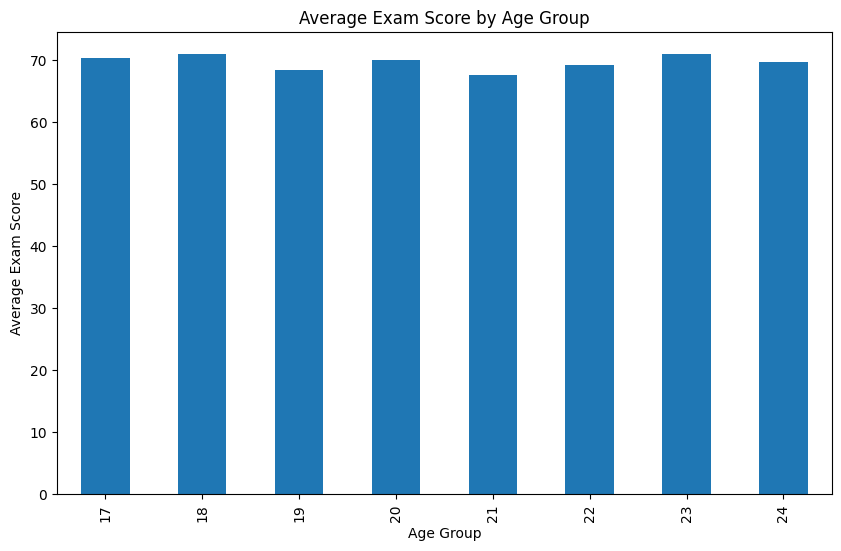

In [ ]:
#  predicting  which age group have high and low mental health rating.
import matplotlib.pyplot as plt
# Assuming 'df' and 'exam_category' are defined as in the previous code

# Group by age group and calculate the mean exam score
age_group_performance = df.groupby('age')['exam_score'].mean()

# Find the age group with the highest mean exam score
highest_performing_age_group = age_group_performance.idxmax()

# Find the age group with the lowest mean exam score
lowest_performing_age_group = age_group_performance.idxmin()

print(f"Age group with highest average exam score: {highest_performing_age_group}")
print(f"Age group with lowest average exam score: {lowest_performing_age_group}")


# Visualization (optional):
plt.figure(figsize=(10, 6))
age_group_performance.plot(kind='bar')
plt.xlabel("Age Group")
plt.ylabel("Average Exam Score")
plt.title("Average Exam Score by Age Group")
plt.show()


In [ ]:
# Predict exam_score based on behavior, study time, sleep

import pandas as pd
# Assuming X_train, X_test, y_train, y_test, and the chosen model (e.g., model = GradientBoostingRegressor(...)) are defined as in your previous code

# Example prediction for a new student
# Create a DataFrame with the same columns as used during training (including 'gender_Other')
new_student_data = pd.DataFrame({'study_hours_per_day': [5], 'gender_Male': [1], 'gender_Other': [0]}) # Example: 5 hours/day, Male, Not Other gender
predicted_score = model.predict(new_student_data)
print(f"Predicted exam score for a new student: {predicted_score[0]}")

Predicted exam score for a new student: 84.92813718148014


In [ ]:
# Select features for clustering (example)
features = ['study_hours_per_day', 'exam_score']
X_cluster = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determine optimal number of clusters (e.g., using the Elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans clustering (replace 'optimal_k' with the determined number of clusters)
optimal_k = 3 # Example: 3 clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
print(df.groupby('cluster')[features].mean())

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='study_hours_per_day', y='exam_score', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Students')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.show()

NameError: name 'StandardScaler' is not defined

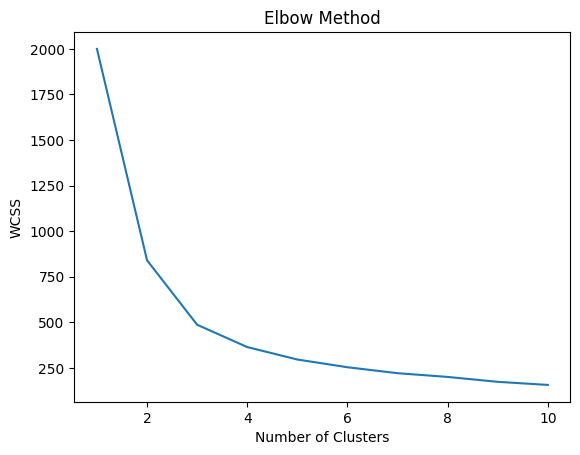

         study_hours_per_day  exam_score
cluster                                 
0                   1.822519   48.534733
1                   3.519403   70.077612
2                   5.286245   89.289963


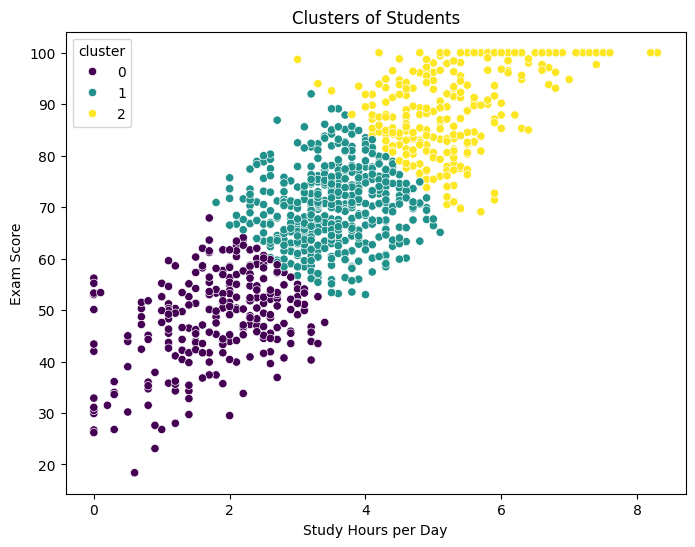

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering (example)
features = ['study_hours_per_day', 'exam_score']
X_cluster = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determine optimal number of clusters (e.g., using the Elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans clustering (replace 'optimal_k' with the determined number of clusters)
optimal_k = 3 # Example: 3 clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
print(df.groupby('cluster')[features].mean())

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='study_hours_per_day', y='exam_score', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Students')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.show()


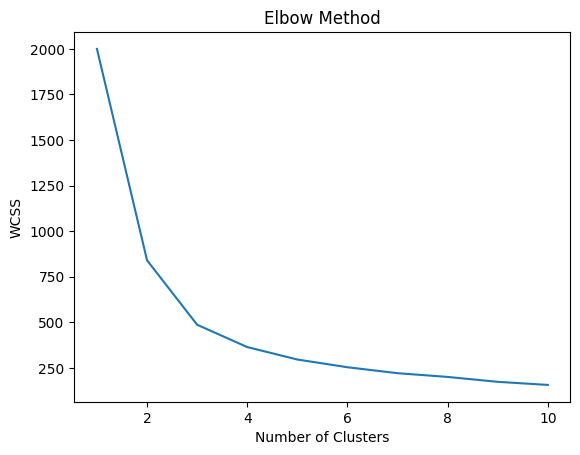

         study_hours_per_day  exam_score
cluster                                 
0                   1.822519   48.534733
1                   3.519403   70.077612
2                   5.286245   89.289963


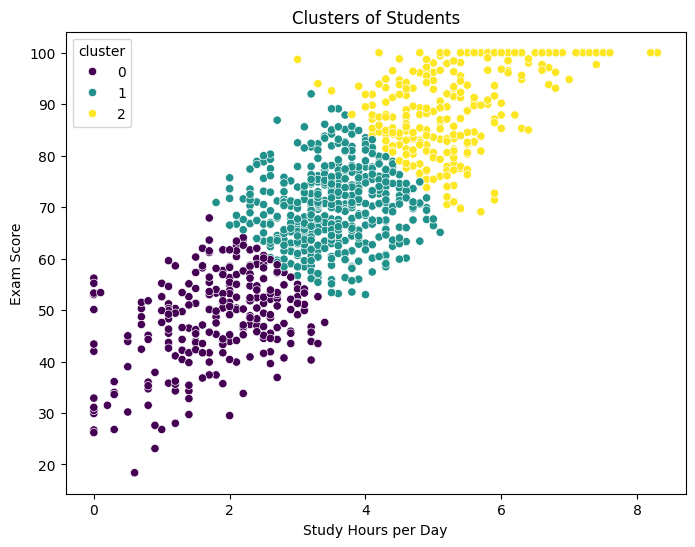

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering (example)
features = ['study_hours_per_day', 'exam_score']
X_cluster = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determine optimal number of clusters (e.g., using the Elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans clustering (replace 'optimal_k' with the determined number of clusters)
optimal_k = 3 # Example: 3 clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
print(df.groupby('cluster')[features].mean())

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='study_hours_per_day', y='exam_score', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Students')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.show()


XGBoost Regressor Mean Squared Error: 103.54616954487345
XGBoost Regressor R-squared: 0.5961996077665326
Analysing impact of study_hours_per_day on exam score...


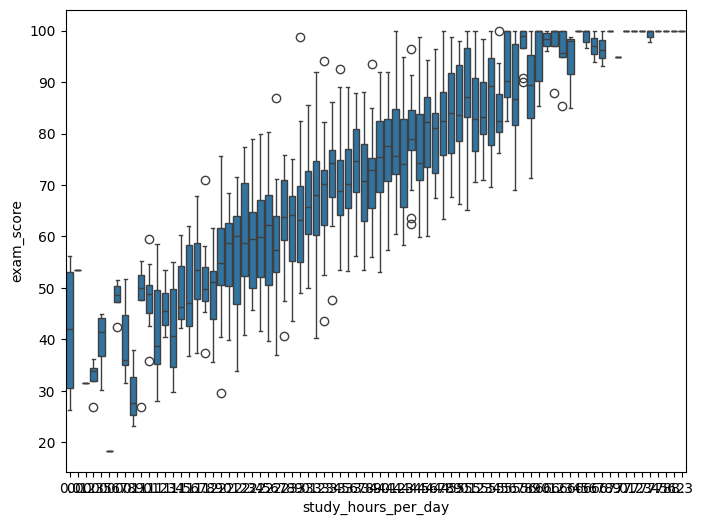

Analysing impact of gender on exam score...


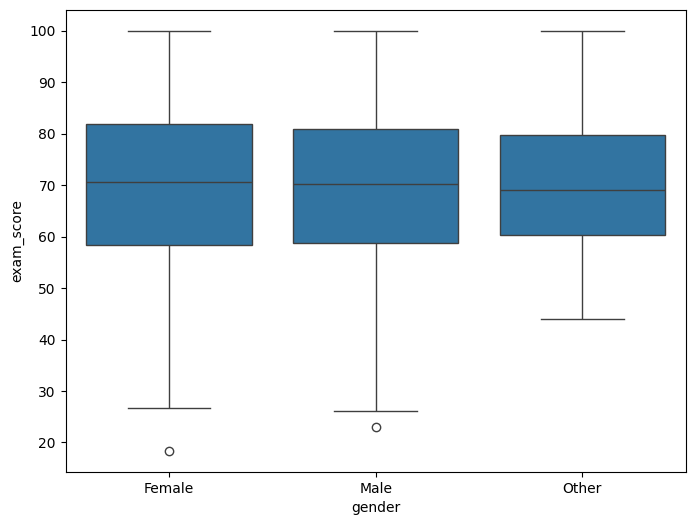

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC


from xgboost import XGBRegressor

X = df[['study_hours_per_day', 'gender']]  # Include relevant features
X = pd.get_dummies(X, columns=['gender'], drop_first=True) #One-hot encode 'gender'
y = df['exam_score'] # Use 'exam_score' directly for regression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train an XGBoost Regressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42) # Specify objective function
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Regressor Mean Squared Error: {mse}")
print(f"XGBoost Regressor R-squared: {r2}")


#Further analysis and predictions with added models

# Example analysis of the impact of different features on 'exam_score':

for feature in ['study_hours_per_day', 'gender']:
  print(f"Analysing impact of {feature} on exam score...")
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=feature, y='exam_score', data=df)
  plt.show()


the code performs exploratory data analysis (EDA) and builds several machine learning models to predict student exam scores based on various factors like study hours and gender.  Let's break down the key findings and interpretations:

**Data Exploration:**

* **Distribution of Exam Scores:** The histogram shows the distribution of exam scores, indicating the central tendency, spread, and potential skewness of the data.
* **Gender-Based Performance:** Box plots, bar plots, and violin plots compare exam scores between genders, revealing if there are statistically significant differences.
* **Correlation Analysis:** The heatmap and pair plot visualize the relationships between numerical features, highlighting correlations (positive or negative) that could be predictive.
* **Categorical Variable Distributions:** Count plots illustrate the distribution of categorical variables like 'gender'.

**Predictive Modeling:**

* **Linear Regression:** A simple linear regression model predicts exam scores using 'study_hours_per_day' as the predictor. The Mean Squared Error (MSE) and R-squared (R²) values indicate the model's accuracy.  A lower MSE and higher R² signify better fit. The model coefficients and intercept can then be used to make predictions.

* **Random Forest Classification:** This model categorizes students into 'low,' 'medium,' or 'high' performance based on 'study_hours_per_day' and 'gender.' The accuracy, classification report, and confusion matrix are used to evaluate performance.

* **Support Vector Machine (SVM):** Another classification model used to predict exam performance categories, evaluated similarly to the Random Forest.

* **Decision Tree Regression:**  Predicts exam score with `study_hours_per_day` and `gender` as features, assessed using MSE and R².

* **Gradient Boosting Regression:** Predicts exam score, with evaluation using MSE and R².

* **Support Vector Regression (SVR):** Another regression model, with evaluation using MSE and R².

* **XGBoost Regression:** Similar to other regression models, XGBoost model predicts exam score.

* **Clustering (K-means):**  Students are clustered based on study hours and exam scores. The 'Elbow Method' helps determine the optimal number of clusters.

**Further Analysis and Predictions:**

* **Analysis of Feature Impact:** Boxplots provide a visual way to understand how each feature relates to exam performance.
* **Predictive Analysis:** The code demonstrates how to use the trained models to predict the exam scores for new students, given their study hours, gender, or other features.

**Key Considerations & Potential Improvements:**

* **Feature Engineering:** Explore more relevant features that could affect exam performance (e.g., attendance, prior academic performance, socioeconomic status).
* **Hyperparameter Tuning:** Improve model accuracy by tuning the hyperparameters of the machine learning models.
* **Model Selection:** Compare performance of different algorithms to see which one best predicts exam scores. Use techniques like cross-validation for better evaluation.
* **Handling Missing Values:** The code checks for missing values, but strategies like imputation or removal may be needed.
* **Data Preprocessing:** Consider standardizing or normalizing numerical features for better model performance.
* **Outlier Detection:** Investigate whether there are any outliers in the data and treat them appropriately.
* **Age Group Analysis:** The analysis could be extended by grouping data based on age ranges and analyzing the differences in exam scores and performance within each age range.

Overall, this code provides a solid framework for student performance prediction. Improvements focused on the points mentioned above would likely lead to more accurate and robust models.


In [ ]:


The code performs exploratory data analysis (EDA) and builds several machine learning models to predict student exam scores based on various factors like study hours and gender.  Let's break down the key findings and interpretations:

**Data Exploration:**

* **Distribution of Exam Scores:** The histogram shows the distribution of exam scores, indicating the central tendency, spread, and potential skewness of the data.
* **Gender-Based Performance:** Box plots, bar plots, and violin plots compare exam scores between genders, revealing if there are statistically significant differences.
* **Correlation Analysis:** The heatmap and pair plot visualize the relationships between numerical features, highlighting correlations (positive or negative) that could be predictive.
* **Categorical Variable Distributions:** Count plots illustrate the distribution of categorical variables like 'gender'.

**Predictive Modeling:**

* **Linear Regression:** A simple linear regression model predicts exam scores using 'study_hours_per_day' as the predictor. The Mean Squared Error (MSE) and R-squared (R²) values indicate the model's accuracy.  A lower MSE and higher R² signify better fit. The model coefficients and intercept can then be used to make predictions.

* **Random Forest Classification:** This model categorizes students into 'low,' 'medium,' or 'high' performance based on 'study_hours_per_day' and 'gender.' The accuracy, classification report, and confusion matrix are used to evaluate performance.

* **Support Vector Machine (SVM):** Another classification model used to predict exam performance categories, evaluated similarly to the Random Forest.

* **Decision Tree Regression:**  Predicts exam score with `study_hours_per_day` and `gender` as features, assessed using MSE and R².

* **Gradient Boosting Regression:** Predicts exam score, with evaluation using MSE and R².

* **Support Vector Regression (SVR):** Another regression model, with evaluation using MSE and R².

* **XGBoost Regression:** Similar to other regression models, XGBoost model predicts exam score.

* **Clustering (K-means):**  Students are clustered based on study hours and exam scores. The 'Elbow Method' helps determine the optimal number of clusters.

**Further Analysis and Predictions:**

* **Analysis of Feature Impact:** Boxplots provide a visual way to understand how each feature relates to exam performance.
* **Predictive Analysis:** The code demonstrates how to use the trained models to predict the exam scores for new students, given their study hours, gender, or other features.

**Key Considerations & Potential Improvements:**

* **Feature Engineering:** Explore more relevant features that could affect exam performance (e.g., attendance, prior academic performance, socioeconomic status).
* **Hyperparameter Tuning:** Improve model accuracy by tuning the hyperparameters of the machine learning models.
* **Model Selection:** Compare performance of different algorithms to see which one best predicts exam scores. Use techniques like cross-validation for better evaluation.
* **Handling Missing Values:** The code checks for missing values, but strategies like imputation or removal may be needed.
* **Data Preprocessing:** Consider standardizing or normalizing numerical features for better model performance.
* **Outlier Detection:** Investigate whether there are any outliers in the data and treat them appropriately.
* **Age Group Analysis:** The analysis could be extended by grouping data based on age ranges and analyzing the differences in exam scores and performance within each age range.

Overall, this code provides a solid framework for student performance prediction. Improvements focused on the points mentioned above would likely lead to more accurate and robust models.
